In [11]:
from preprocessing.data_loader import load_and_process_data

df = load_and_process_data(normalize=True, lab="1")
df

Loading data from C:\Users\AugustPC\OneDrive\School\4S\Project\Data\df_v2.csv
Normalizing data for lab 1...
Normalized data successfully loaded from lab 1.


,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.111522,-0.299382,-0.075682,0.565574,0.091333,-0.606679,-0.994060,1.0,1.0,3.0,1.0,1
1,-0.202800,-0.767556,-0.399169,-0.350577,-0.609176,-1.142420,-1.173545,1.0,1.0,3.0,2.0,1
2,-0.974516,0.692252,0.952632,-0.038895,-0.205652,-0.226064,-1.213133,1.0,1.0,3.0,3.0,1
3,-1.182411,-0.908542,2.311391,2.652268,0.082751,-0.520504,-1.246786,1.0,1.0,1.0,6.0,1
6,-1.269229,-0.662680,2.357461,0.396161,-0.105377,-1.151600,-1.214830,1.0,1.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
619528,0.114936,-0.574415,-0.387168,0.144752,2.010959,0.323425,-0.473414,10.0,1.0,3.0,64081.0,10
619529,0.682036,0.485504,-0.663542,-0.843301,-0.918013,-1.269213,-0.249127,10.0,1.0,3.0,64082.0,10
619530,-0.520848,0.268702,1.442341,-1.187223,-0.483940,0.112042,0.667490,10.0,1.0,2.0,64083.0,10
619532,-0.681788,1.935264,-0.590493,-0.116387,-0.108594,-1.244985,0.229343,10.0,1.0,3.0,64086.0,10


In [12]:
# only keep ["slowdelta", "fastdelta", "slowtheta", "fasttheta", "alpha", "beta", "rms", "sleepstage"]
X = df.drop(columns=['mouseID', 'lab', 'sleepstage', 'epoch', 'unique_id'])
y = df['sleepstage']
X = X.to_numpy()
y = y.to_numpy()
X = X.T

In [13]:
import numpy as np
import torch

# sort_idx = np.argsort(y)
rand_idx = np.random.choice(X.shape[1], 100_000, replace=False)
X = X[:, rand_idx]
y = y[rand_idx]

# sort
sort_idx = np.argsort(y)
X = X[:, sort_idx]
y = y[sort_idx]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = torch.tensor(X).to(device)

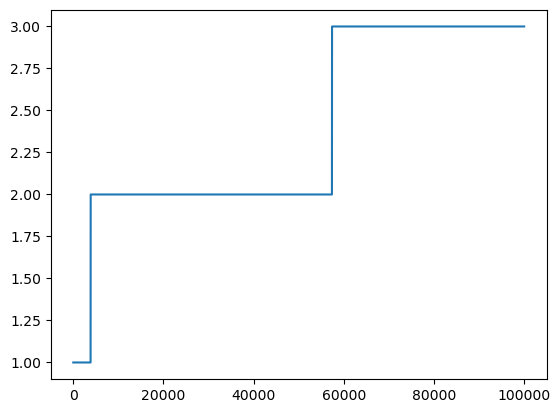

In [14]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [15]:
from tqdm import tqdm
from CGD import AA_model, AA_trainer

K_list = [2, 3, 4, 5, 6]

C_list = []
S_list = []

for K in tqdm(K_list):
    model = AA_model.AA(X=data,num_comp=K,model='AA', verbose=False)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    loss,_ = AA_trainer.Optimizationloop(model=model,optimizer=optimizer,max_iter=10000,tol=1e-6, disable_output=True)
    C, S = model.get_model_params()
    C_list.append(C)
    S_list.append(S)

100%|██████████| 5/5 [00:43<00:00,  8.76s/it]


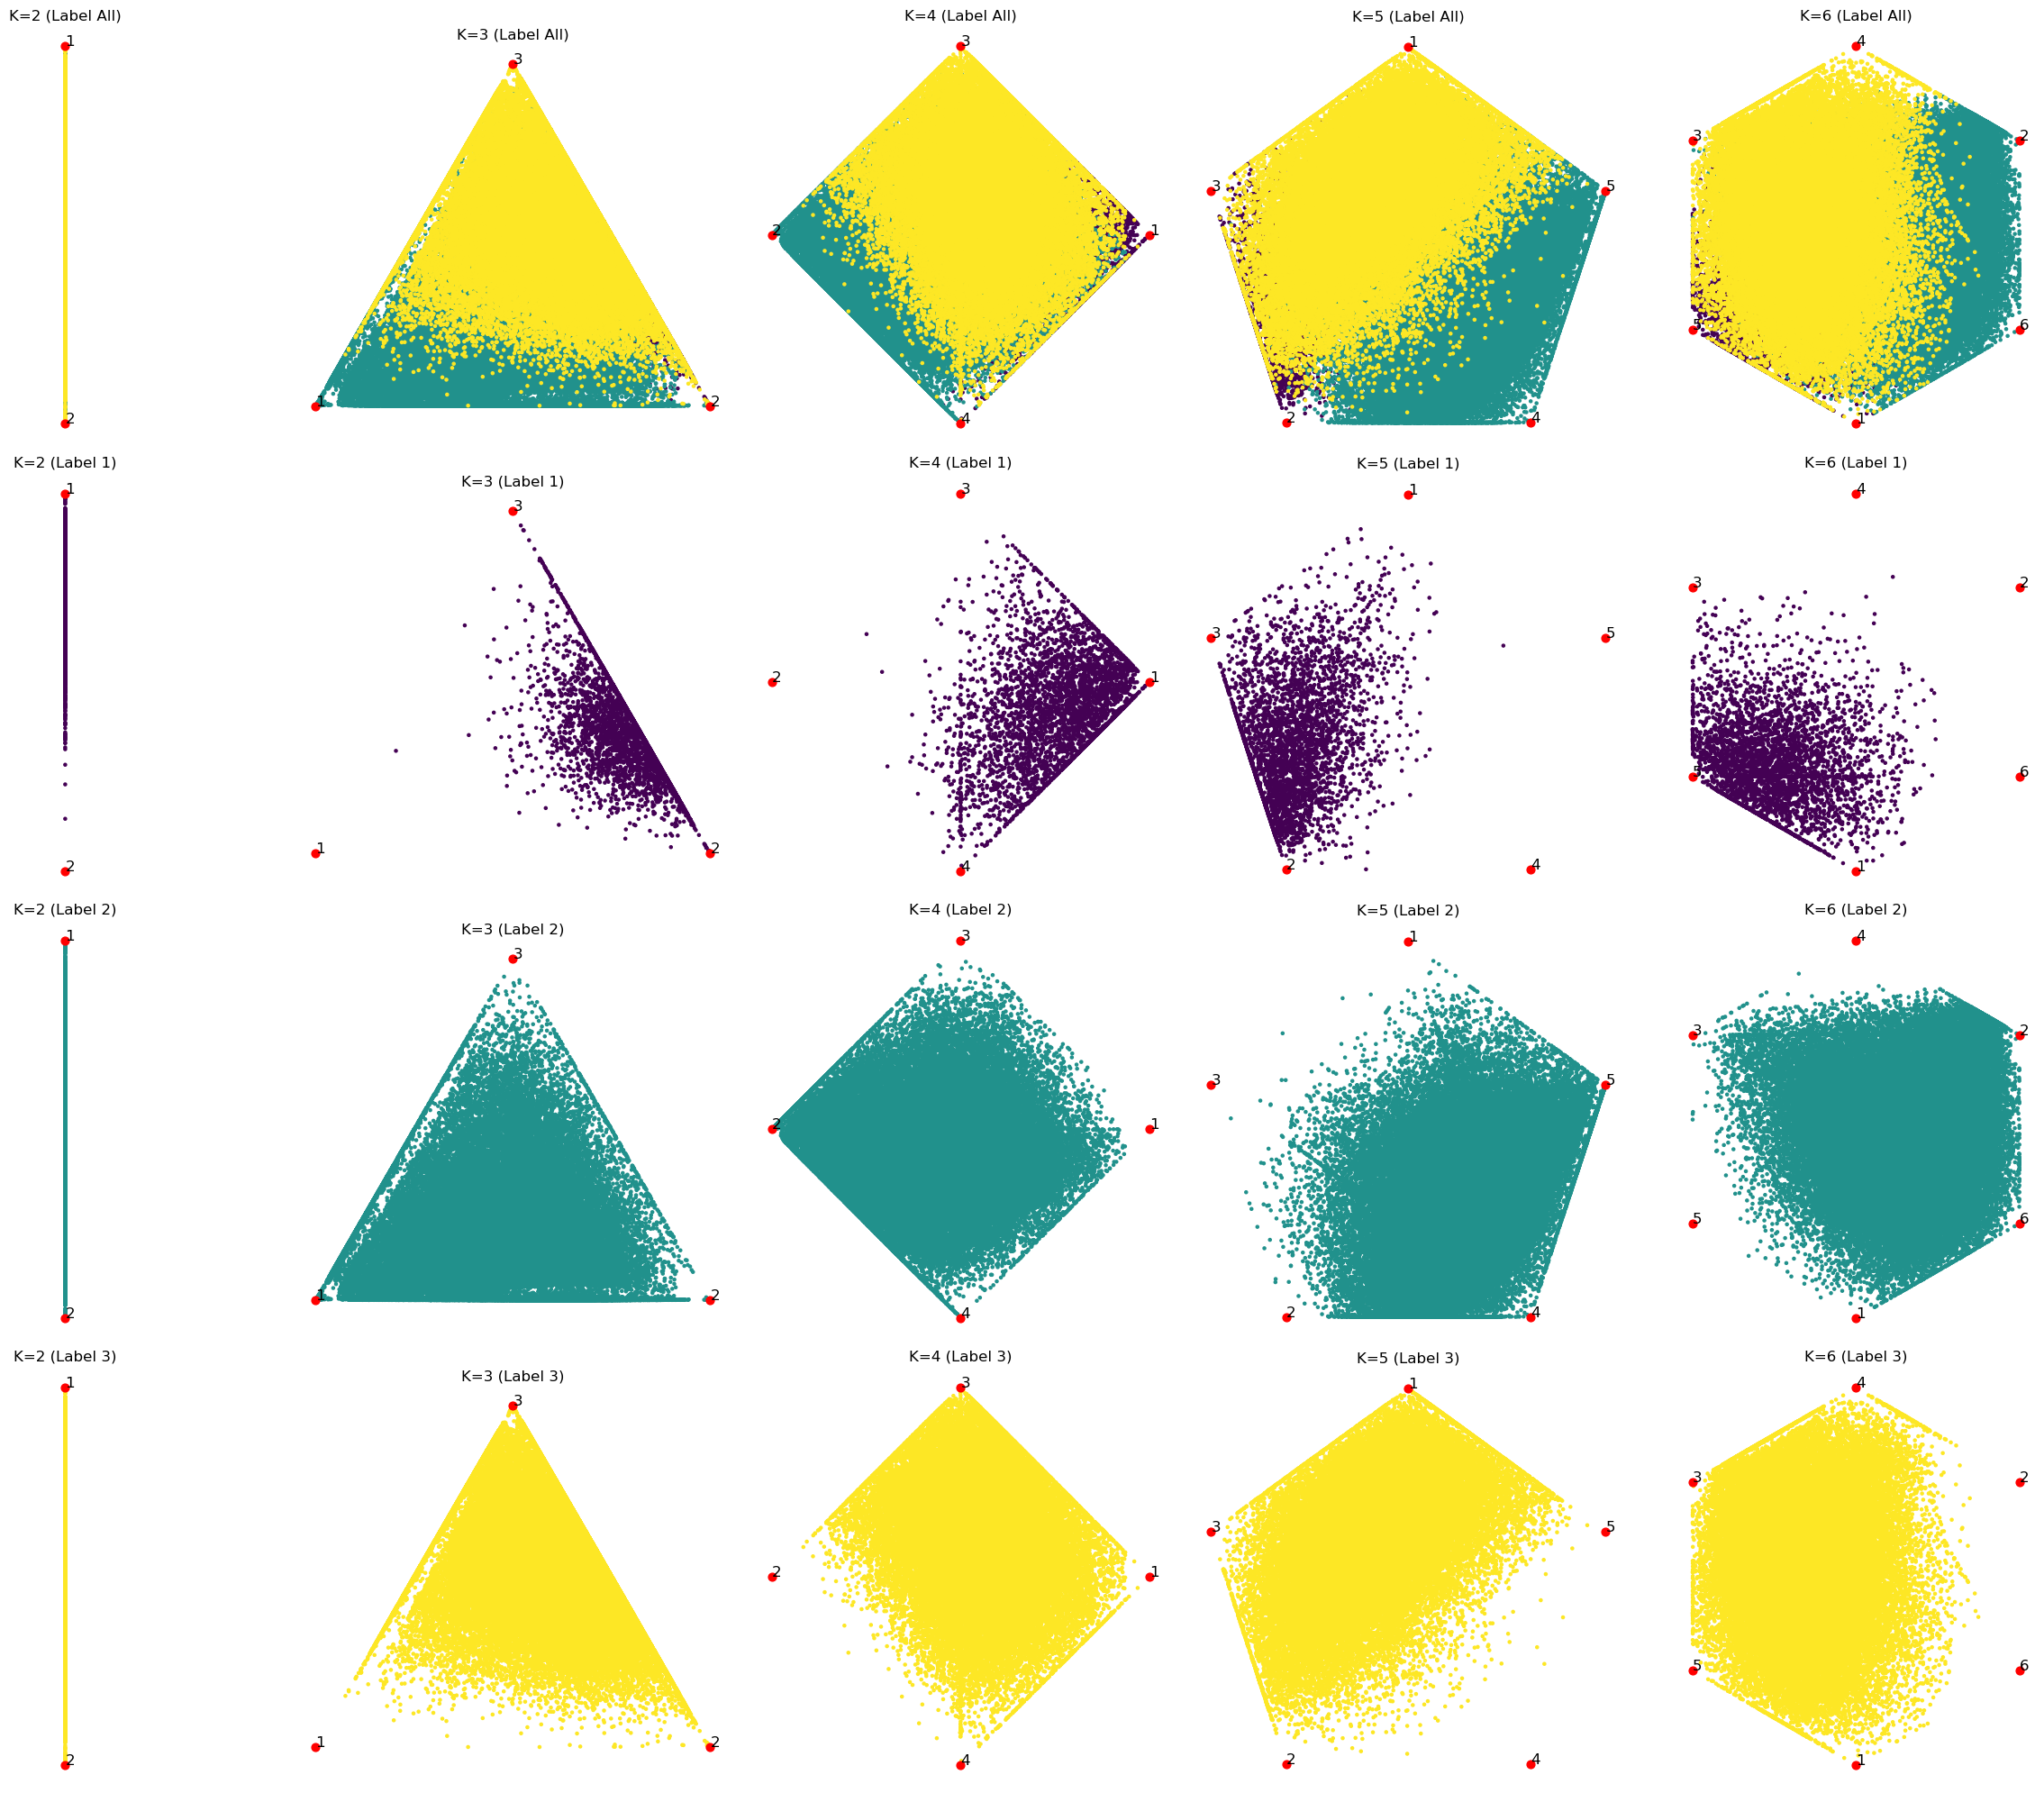

In [16]:
from utils.AA_visualize import *
plot_AA_reconstructed_angles_multiple_sep(X, C_list, S_list, K_list, y, point_size=5)